In [1]:
# libraries
import random
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import datetime as dt
import fuzzywuzzy
from fuzzywuzzy import process

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
plt.style.use('ggplot')

import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import warnings; warnings.filterwarnings("ignore")


# unhide all rows and columns
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 1000)

# to show multiple outputs of multiple variables from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for character encoding
import chardet

In [2]:
# load data
dataset = "../input/meta-kaggle/ForumMessages.csv"
df = pd.read_csv(dataset, delimiter=",", encoding="latin-1")
df.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,1412,197,4538,11/24/2010 02:44:04,NaN,120822+164809 rows&nbsp; x61 cols of data. Pyt...,NaN,NaN
1,1413,197,4596,11/24/2010 02:44:04,NaN,I'm not sure you've actually tried it. &nbsp;I...,NaN,NaN
2,1414,197,4538,11/24/2010 02:44:04,NaN,Just tell me how long it takes for python to r...,NaN,NaN
3,1415,197,3826,11/24/2010 02:44:04,NaN,mines between 5.7 and 5.9 seconds. &nbsp;Sure ...,NaN,NaN
4,1416,197,4538,11/24/2010 02:44:04,NaN,Can you post code for loading and parsing? Loo...,NaN,NaN


In [3]:
df.dtypes

Id                         int64
ForumTopicId               int64
PostUserId                 int64
PostDate                  object
ReplyToForumMessageId    float64
Message                   object
Medal                    float64
MedalAwardDate            object
dtype: object

In [4]:
df.PostDate = pd.to_datetime(df.PostDate)

In [5]:
df22 = df[df.PostDate >= "01/01/2022 00:00:00"].reset_index(drop=True).sort_values("PostDate")
df22.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
2646,1634638,297587,6674022,2022-01-01 00:01:31,1633064.0,<p>A few vacation nights ð¤£</p>,3.0,01/02/2022
27509,1634639,292470,2116564,2022-01-01 00:01:56,1632667.0,<p>tank you reply. <br>\nyou are a really hard...,NaN,NaN
7934,1634640,298131,19298,2022-01-01 00:04:20,NaN,<p>Congratulations everyone! The TSP had surpr...,1.0,01/02/2022
3089,1634641,297960,2116564,2022-01-01 00:16:45,1633485.0,<p>you meanâ¦ Overfitting is Key Solution?</p>,3.0,01/02/2022
7924,1634642,298050,2116564,2022-01-01 00:18:42,1634101.0,<p>Would you please add S.Korean? :)<br>\nìí...,3.0,01/01/2022


In [6]:
hour = pd.to_datetime(df22["PostDate"]).dt.hour
df22.insert(5,"Hour",hour)

count = df22.Hour.value_counts()
count.sort_index()

0      635
1      765
2      824
3      892
4     1029
5     1174
6     1354
7     1243
8     1329
9     1469
10    1460
11    1540
12    1559
13    1710
14    1818
15    1650
16    1920
17    1632
18    1536
19    1466
20    1266
21     976
22     735
23     685
Name: Hour, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Number of Forum Messages by Hour')

Text(0, 0.5, 'Number of Forum Messages')

Text(0.5, 0, 'Hour')

<AxesSubplot:title={'center':'Number of Forum Messages by Hour'}, xlabel='Hour', ylabel='Number of Forum Messages'>

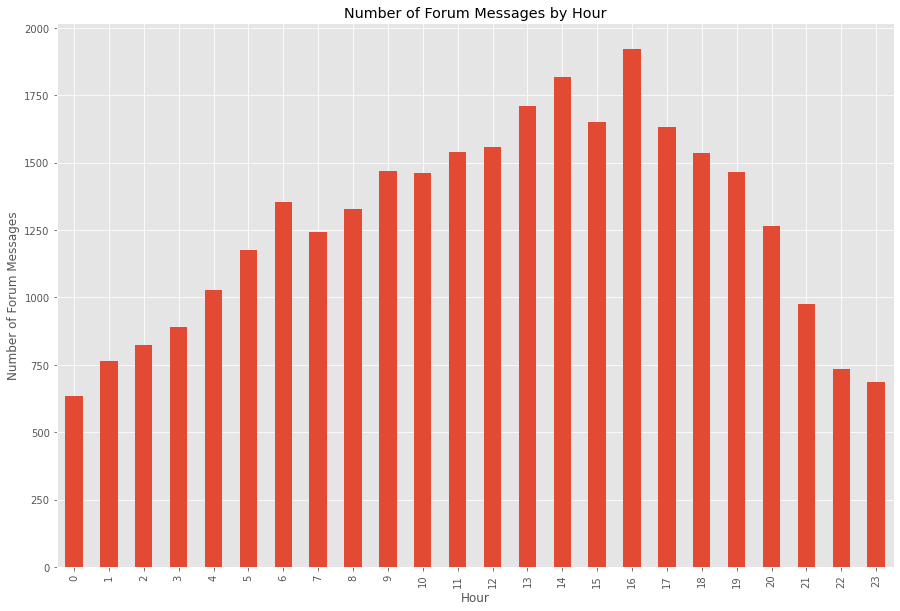

In [7]:
plt.figure(figsize=(15,10))
plt.title("Number of Forum Messages by Hour")
plt.ylabel("Number of Forum Messages")
plt.xlabel("Hour")
count.sort_index().plot.bar(x=df22.Hour)

**Jan 2022: Best time to maximize the chance of user interaction on Kaggle is from 13:00 to 17:00 GMT.**

**If you're reading this, please upvote.**